# TP2 - Recognition of handwritten digits by $k$ nearest neighbors (2024 JF)

The objective of this practical session is to recognize handwritten digits from a test database using a training database and the $k$ nearest neighbor method.
The MNIST database of handwritten digits includes a set of 60,000 training examples (*database_train_images*) and a set of 10,000 test examples (*database_test_images*).  The digits, some examples of which are shown in the figure below, were normalized and centered in a fixed size $28 \times 28$ pixels image.

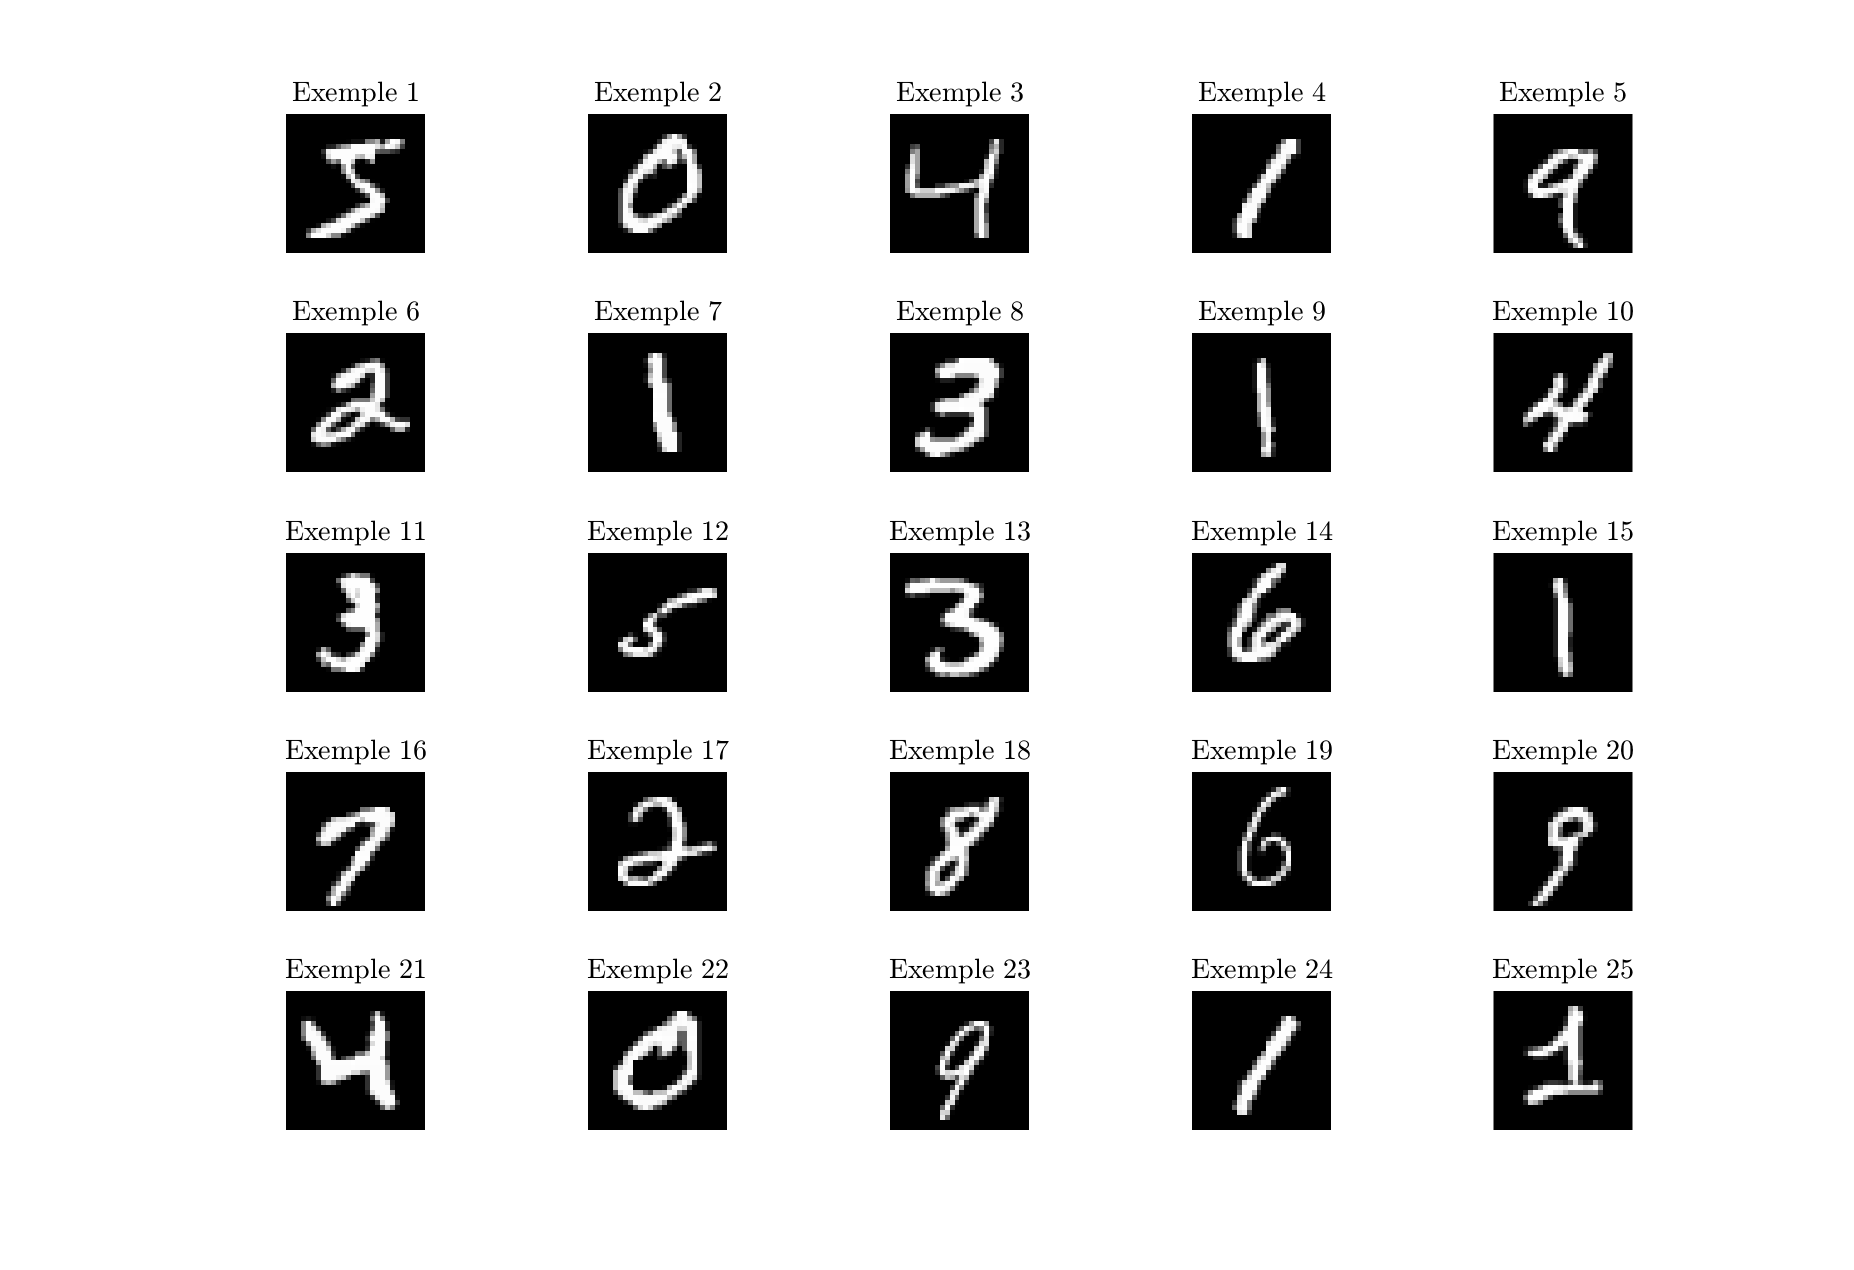


Each image is considered as a 1D vector of $28\times 28=784$ coordinates. We provide the labels of the learning (*y_train*) and test (*y_test*) sets.
(*y_test*).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import math
import scipy as sc
from sklearn.metrics.pairwise import euclidean_distances

### Loading the MNIST database

Link to the handwritten figures dataset :
http://yann.lecun.com/exdb/mnist/

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

X, y = mnist["data"], mnist["target"]

DataApp , DataTest , LabelApp , LabelTest = X[:60000] , X[60000:] , y[:60000] , y[60000:]

print('DataApp: ' + str(DataApp.shape))
print('DataTest:' + str(DataTest.shape))
print(' LabelApp:  '  + str(LabelApp.shape))
print('LabelTest:  '  + str(LabelTest.shape))

# Conversion in matrices
DataApp=np.asarray(DataApp)
DataTest=np.asarray(DataTest)
LabelApp=np.asarray(LabelApp)
LabelTest=np.asarray(LabelTest)

DataApp: (60000, 784)
DataTest:(10000, 784)
 LabelApp:  (60000,)
LabelTest:  (10000,)


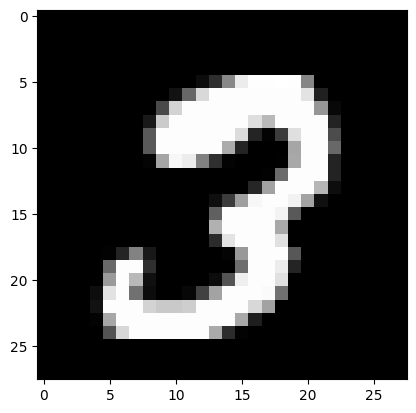

the label of this training image is : 3


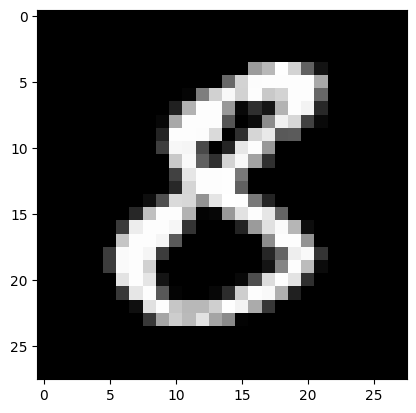

the label of this test image is : 8


In [6]:
# Displaying images of this dataset:

# we display an image dataset of X_train and X_test:
NumImageTrain=12345 # à choisir entre 0 et 59999
Exple1=DataApp[NumImageTrain,:]
ImExple1=np.reshape(Exple1,[28,28])
plt.imshow(ImExple1,cmap='gray')
plt.show()
print("the label of this training image is :", LabelApp[NumImageTrain])

NumImageTest=1234 # à choisir entre 0 et 9999
Exple2=DataTest[NumImageTest,:]
ImExple2=np.reshape(Exple2,[28,28])
plt.imshow(ImExple2,cmap='gray')
plt.show()
print("the label of this test image is :", LabelTest[NumImageTest])

## Exercise 1 : $k$ nearest neighbor method

In artificial intelligence, the $k$-nearest neighbors method ($k$-nn) is a supervised learning method.
In this framework, we have a training database composed of "data-label" pairs. To estimate the output associated to a new input $x$, the $k$ nearest neighbors method consists in taking into account (in an identical way) the $k$ training samples whose input is the closest to the new input $x$, according to a distance to be defined. The associated algorithm and an example are given below.


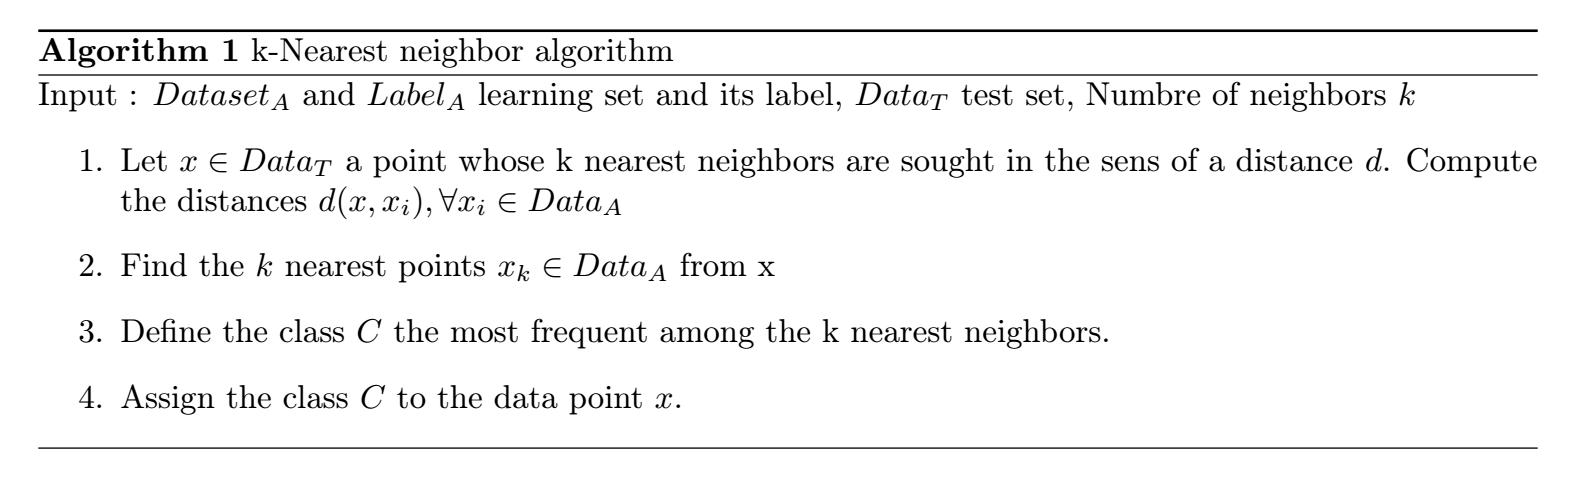

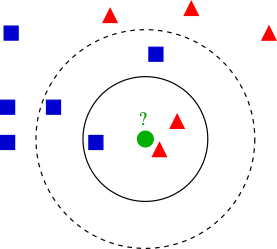

**Classification example $k$-nn:** The test sample (green circle) must be classified into either the first class of blue squares or the second class of red triangles. If k = 3 (solid circle), it is assigned to the second class because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dotted circle), it is assigned to the first class (3 squares versus 2 triangles inside the outer circle)




**Question:**
Using Euclidean distance, complete the function *knn* to perform $k$-ppv classification on a test set from a training set and their labels and specifying the number $k$ neighbors we are looking for.  



### Interesting python functions :
List of functions (libraries) :

- euclidean_distance (sklearn)
- mode (scipy.stats) [change to handle the equality case].
- argsort (numpy)

In [ ]:
def knn(DataApp,DataTest,labelApp,K,Nt_test):

    Na=DataApp.shape[0]
    Nt=DataTest.shape[0]


    # Initialization of the test image labeling vector
    Partition = np.zeros((Nt_test,1));

    # Loop on the test vectors of the whole evaluation
    for i in range(Nt_test):

        print('Image test n',i)

        # Compute the distances between the test vectors
        # and the training vectors (neighbors)
        # TO BE COMPLETED

        # We keep only the indices of the K + nearest neighbors
        # TO BE COMPLETED

        # Count the number of neighbors belonging to each class
        # TO BE COMPLETED


        # Search for the class containing the maximum number of neighbors
        # TO BE COMPLETED

        # If the test image has the highest number of neighbors in several
        # classes, then it is assigned the one with the closest neighbor,
        # otherwise it is assigned the only class containing the most neighbors
        # TO BE COMPLETED

        # Assign the label corresponding ‡ the class found at the point
        # corresponding to the i-th test image in the "Partition" vector
        # TO BE COMPLETED


    return Partition

In [ ]:
# Choice of the number of neighbors
K = 1;

# Number of data to be tested
Nt=DataTest.shape[0]
Nt_test = int(Nt/1000); # A changer, pouvant aller jusqu'a Nt


# Classification by k-nn
Partition = knn(DataApp,DataTest,LabelApp,K,Nt_test);

# Display of prediction and ground truth
#ConfusionMatrix=np.zeros((10,10))
#print('Knn result',Partition.T)
#print('Ground truth',LabelTest[:Nt_test])

## Exercise 2: Recognition evaluation

Given the exact labels of the test set data, the evaluation of the correct recognition is performed by a confusion matrix and by an error rate:
- The confusion matrix is a $10\times 10$ matrix whose generic index element $(i,j)$ is the number of class vectors corresponding to index $i$ that were assigned to the class corresponding to index $j$ by the decision process. If the confusion matrix is diagonal then the recognition is perfect.
- The error rate is a percentage defined by the number of off-diagonal elements of the confusion matrix divided by the total number of elements tested.

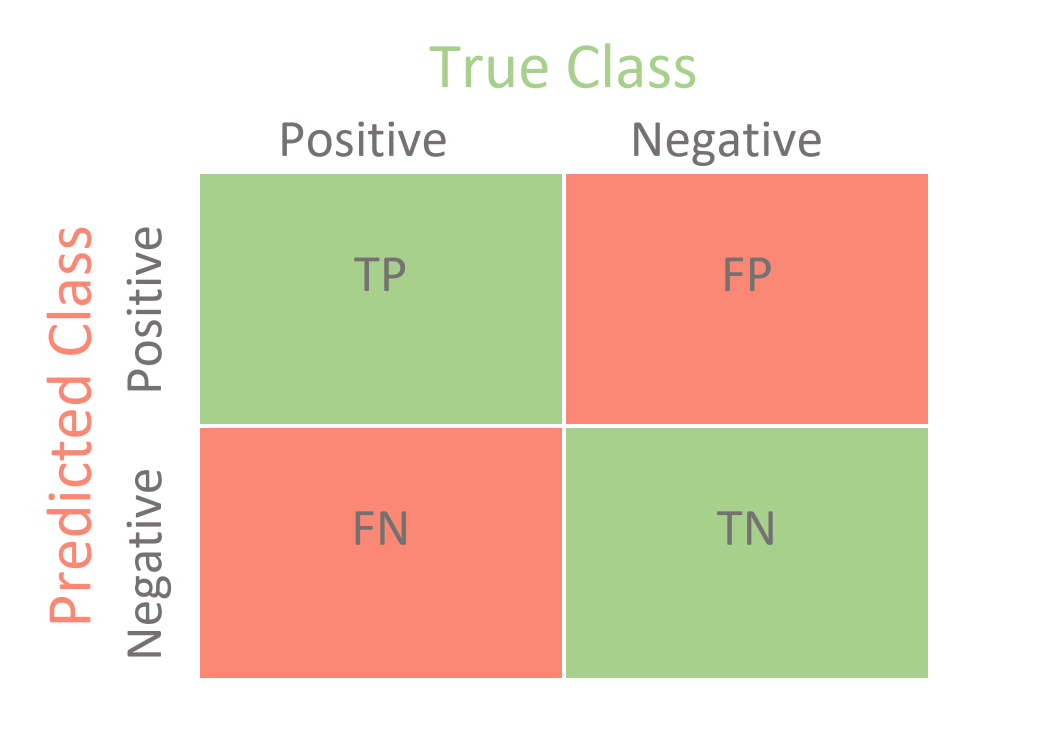


**Question:**
- Using the test set labels, complete *kppv* to add the calculation of the confusion matrix and the error rate.
- Test the algorithm for $k=1$ and $k=10$ and calculate the respective error rates.